In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# reading the dataset
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
#check if there is any NULL data
df.isnull().any().any()


False

In [ ]:
# import kmeans and vq functions
from scipy.cluster.vq import kmeans,vq
# import the whiten function to standardize the data
from scipy.cluster.vq import whiten


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


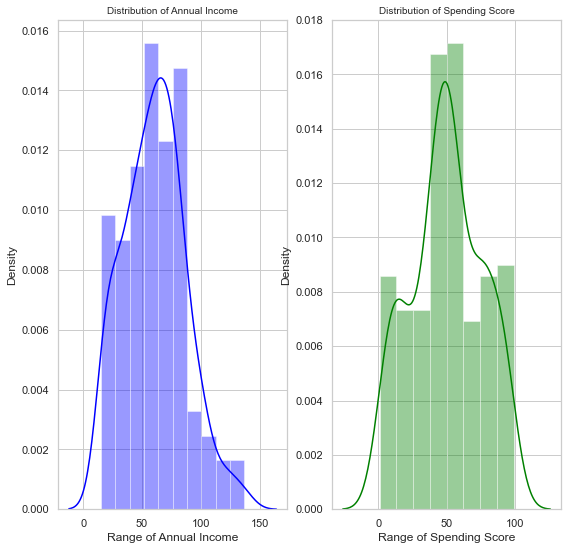

In [ ]:
# visualize the data
# draw two subplots on a row
plt.subplot(1,2,1)
sns.set(style='whitegrid')
sns.distplot(df['Annual Income (k$)'],color='blue')
plt.title('Distribution of Annual Income', fontsize = 10)
plt.xlabel('Range of Annual Income')


plt.subplot(1,2,2)
sns.set(style='whitegrid')
sns.distplot(df['Spending Score (1-100)'],color='green')
plt.title('Distribution of Spending Score', fontsize = 10)
plt.xlabel('Range of Spending Score')
plt.show()

In [ ]:
# investigate the 'gender' colum
print(df['Gender'])


0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object


In [ ]:
labels = ['Male','Female']
size = df['Gender'].value_counts()
# count the number of each gender
print(size)

Female    112
Male       88
Name: Gender, dtype: int64


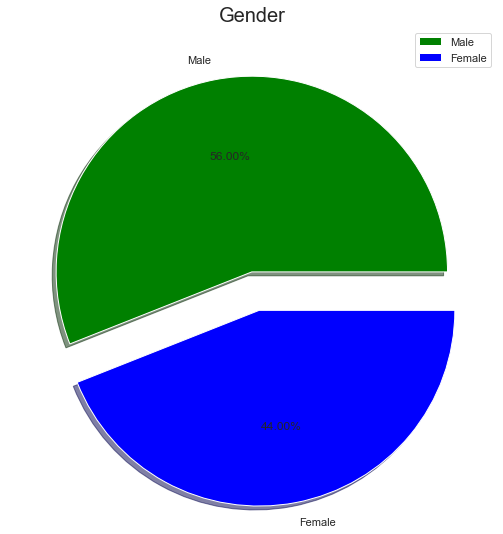

In [ ]:
colors = ['green','blue']
explode = [0,0.2]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
df['scaled_spending'] = whiten(df['Spending Score (1-100)'])
df['scaled_income'] = whiten(df['Annual Income (k$)'])
df['scaled_age'] = whiten(df['Age'])

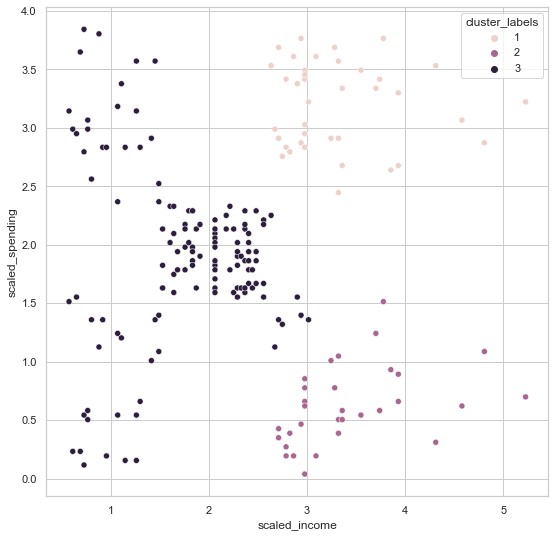

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
distance_matrix_ward = linkage(df[['scaled_income','scaled_spending']], method = 'ward', metric = 'euclidean')
# Assign cluster labels
df['cluster_labels'] = fcluster(distance_matrix_ward, 3, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='scaled_income', y='scaled_spending', 
                hue='cluster_labels', data = df)
plt.show()




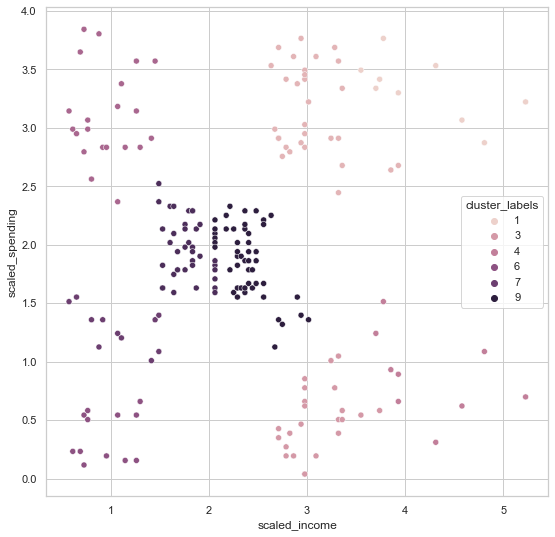

In [ ]:
# complete method
distance_matrix_complete = linkage(df[['scaled_income','scaled_spending']], method = 'complete', metric = 'euclidean')
# Assign cluster labels
df['cluster_labels'] = fcluster(distance_matrix_ward, 3, criterion='distance')

# Plot clusters
sns.scatterplot(x='scaled_income', y='scaled_spending', 
                hue='cluster_labels', data = df)
plt.show()

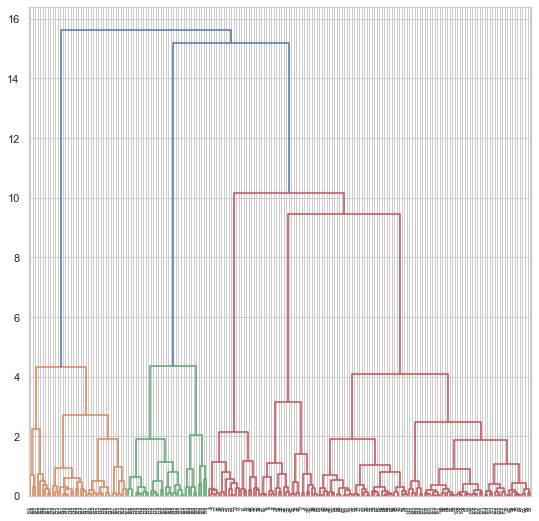

In [ ]:
# Create a dendrogram
from scipy.cluster.hierarchy import dendrogram
dn = dendrogram(distance_matrix_ward)
plt.show()

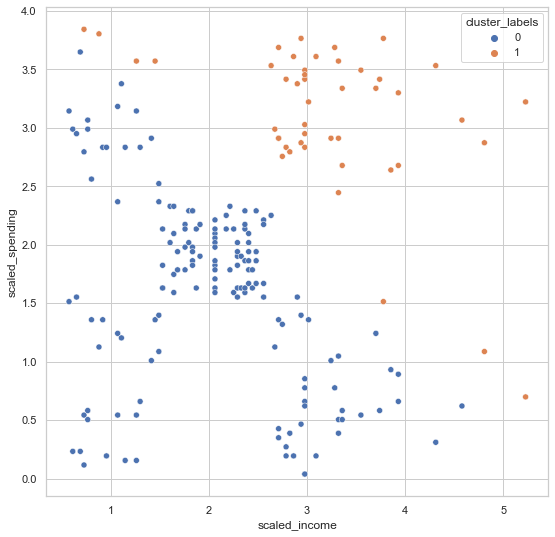

In [ ]:
# KMeans clustering
from scipy.cluster.vq import kmeans,vq
# Generate cluster centers
cluster_centers, distortion = kmeans(df[['scaled_income','scaled_spending']],2)
# Assign cluster labels
df['cluster_labels'], distortion_list = vq(df[['scaled_income','scaled_spending']], cluster_centers)
# Plot clusters
sns.scatterplot(x='scaled_income', y='scaled_spending', 
                hue='cluster_labels', data = df)
plt.show()

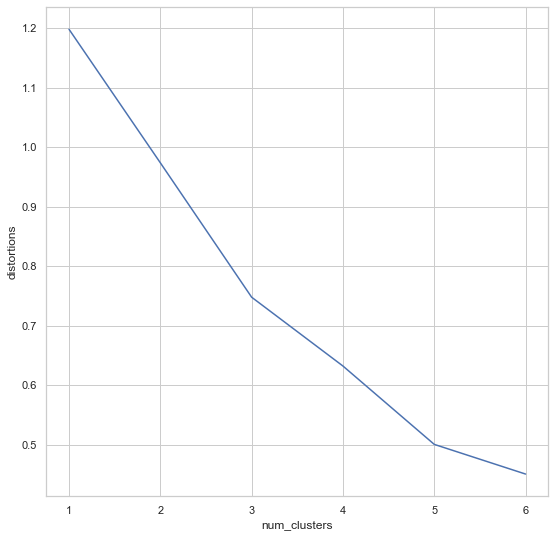

In [ ]:
#elbow method --> decide the number of clusters for an uniform data
distortions = []
num_clusters = range(1,7) 
# 1,2,3,4,5,6

for i in num_clusters:
    cluster_centers, distortion = kmeans(df[['scaled_income','scaled_spending']],i)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

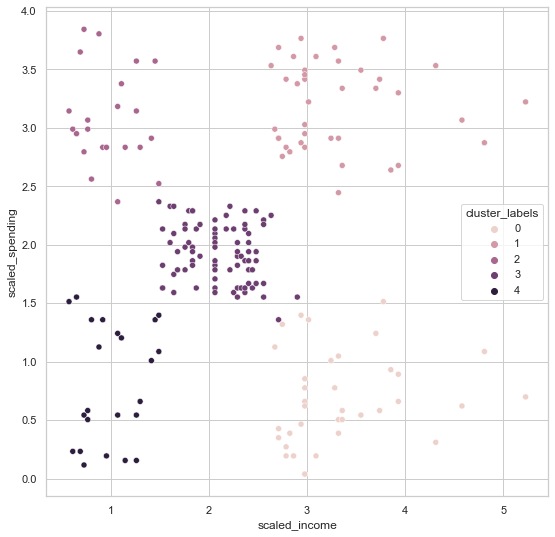

In [ ]:
# impact of seed
from numpy import random
random.seed(10)
# Generate cluster centers
cluster_centers, distortion = kmeans(df[['scaled_income','scaled_spending']],5)
# Assign cluster labels
df['cluster_labels'], distortion_list = vq(df[['scaled_income','scaled_spending']], cluster_centers)
# Plot clusters
sns.scatterplot(x='scaled_income', y='scaled_spending', 
                hue='cluster_labels', data = df)
plt.show()

cluster_labels
0    36
1    39
2    22
3    80
4    23
Name: Age, dtype: int64


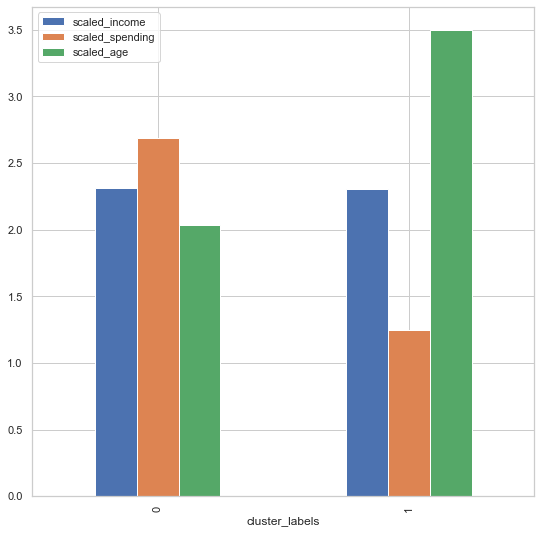

In [ ]:
# multiple features
features=['scaled_income','scaled_spending','scaled_age']
print(df.groupby('cluster_labels')['Age'].count())
# kmeans for 2 clusters
cluster_centers,_ = kmeans(df[features],2)
# assign cluster labels
df['cluster_labels'],_ = vq(df[features],cluster_centers)
#plot
df.groupby('cluster_labels')[features].mean().plot(legend=True, kind='bar')
plt.show()